# Code for setting up the abnormal grain growth geometry 

## Importing Things

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import skimage.morphology as mor
from skimage import measure
import copy

In [2]:
img = np.loadtxt('circle_100.geom')

Grain ID: 0 has area 1040788 and 1000 random coords will be generated


KeyboardInterrupt: 

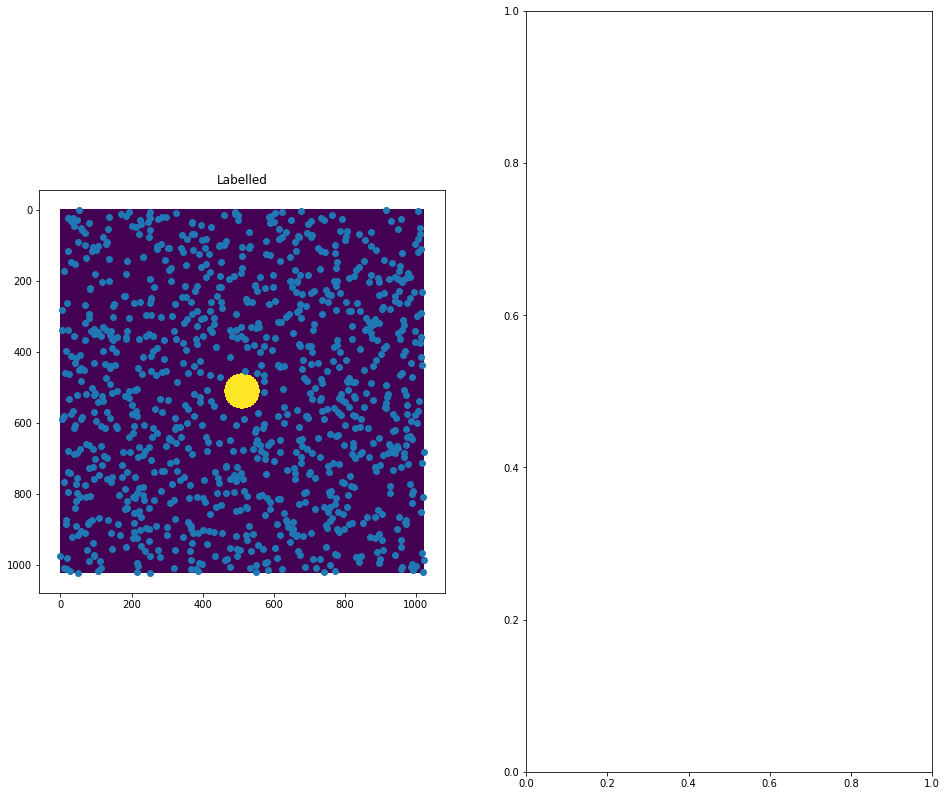

In [6]:
# Find the grains
all_labels = measure.label(img)
max_val = np.max(all_labels)

new_map = copy.deepcopy(all_labels)

# Get grain properties
properties = measure.regionprops(all_labels)
area_list = [prop.area for prop in properties]
coord_list = [prop.coords for prop in properties]

# Plot the data
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(16,14))
#ax1.imshow(img, cmap='gray')
#ax1.set_title('original')
ax2.imshow(all_labels, cmap='viridis')
ax2.set_title('Labelled')

# Find all grains which are above a certain area
for idx, (area, coords) in enumerate(zip(area_list, coord_list)):
    max_phase = np.max(new_map)
    if area > 50000:
        numrand = int(1000)
        
        print('Grain ID: {0} has area {1} and {2} random coords will be generated'.format(idx, area, numrand))
        
        # Find random numbers and get coords     NOTE: THEY ARE (Y,X)!!
        random_ids = np.random.choice(len(coords), numrand)
        random_coords = coords[random_ids]
        
        # Plot the random points
        ax2.scatter(random_coords.transpose()[1], random_coords.transpose()[0])
        
        
        
        # For each coordinate in a grain
        for coord in coords:
            dist=[]
            # Find distance to each random point
            for random_coord in random_coords:
                dist.append(np.sqrt((random_coord[1]-coord[1])**2+(random_coord[0]-coord[0])**2))

            # Reassign grain ID
            new_map[coord[0]][coord[1]] = numrand*idx + np.argmin(dist)
                

        
ax3.imshow(new_map, vmin=max_val)




  